### パッケージとデータセットの準備


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_covtype
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
covtype = fetch_covtype()
X = covtype.data
y = covtype.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# 問1

## 決定木 (チューニング前)

In [3]:
%%time
clf1_default = DecisionTreeClassifier(random_state=1).fit(X_train, y_train)

CPU times: user 13.3 s, sys: 90.3 ms, total: 13.4 s
Wall time: 17.5 s


In [4]:
print('Train accuracy: ', clf1_default.score(X_train, y_train))
print('Test accuracy: ', clf1_default.score(X_test, y_test))

Train accuracy:  1.0
Test accuracy:  0.9399757321239555


## 決定木 (チューニング)

In [5]:
param_grid = {'max_depth': np.arange(6, 31, 3)}

In [6]:
%%time
clf1_cv = DecisionTreeClassifier(random_state=1)
clf1_cv = GridSearchCV(clf１_cv, param_grid, cv=5, return_train_score=True).fit(X_train, y_train)

CPU times: user 5min 56s, sys: 4.02 s, total: 6min
Wall time: 6min 58s


In [7]:
print('Best parameter (depth): ', clf1_cv.best_params_)
print('Best test accuracy: ', clf1_cv.best_score_)

Best parameter (depth):  {'max_depth': 30}
Best test accuracy:  0.9312491827363031


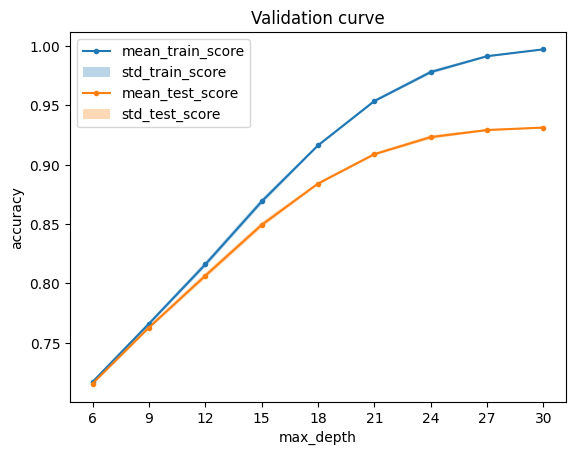

In [8]:
depths = param_grid['max_depth']
cv_results = clf1_cv.cv_results_
mean_train_scores = cv_results['mean_train_score']
std_train_scores = cv_results['std_train_score']
mean_test_scores = cv_results['mean_test_score']
std_test_scores = cv_results['std_train_score']
alpha = 0.3

plt.plot(depths, mean_train_scores, marker='.')
plt.fill_between(depths, mean_train_scores + std_train_scores, mean_train_scores - std_train_scores, alpha=alpha)
plt.plot(depths, mean_test_scores, marker='.')
plt.fill_between(depths, mean_test_scores + std_test_scores, mean_test_scores - std_test_scores, alpha=alpha)
plt.title('Validation curve')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(depths)
plt.legend(['mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score'])

### 最終モデル

In [9]:
%%time
clf1_final = DecisionTreeClassifier(max_depth=15, random_state=1).fit(X_train, y_train)

CPU times: user 8.91 s, sys: 33 ms, total: 8.94 s
Wall time: 9.05 s


In [10]:
print(f'Training accuracy: {clf1_final.score(X_train, y_train)}')
print(f'Test accuracy: {clf1_final.score(X_test, y_test)}')

Training accuracy: 0.8662698011441259
Test accuracy: 0.8501415626102596


# 問2: 

## 特徴量エンジニアリング

In [11]:
features = covtype.feature_names

In [12]:
features = covtype.feature_names
importances = clf1_final.feature_importances_
feature_df = pd.DataFrame({
    'feature': features,
    'importance': importances,
}).sort_values('importance', ascending=True)

<Axes: ylabel='feature'>

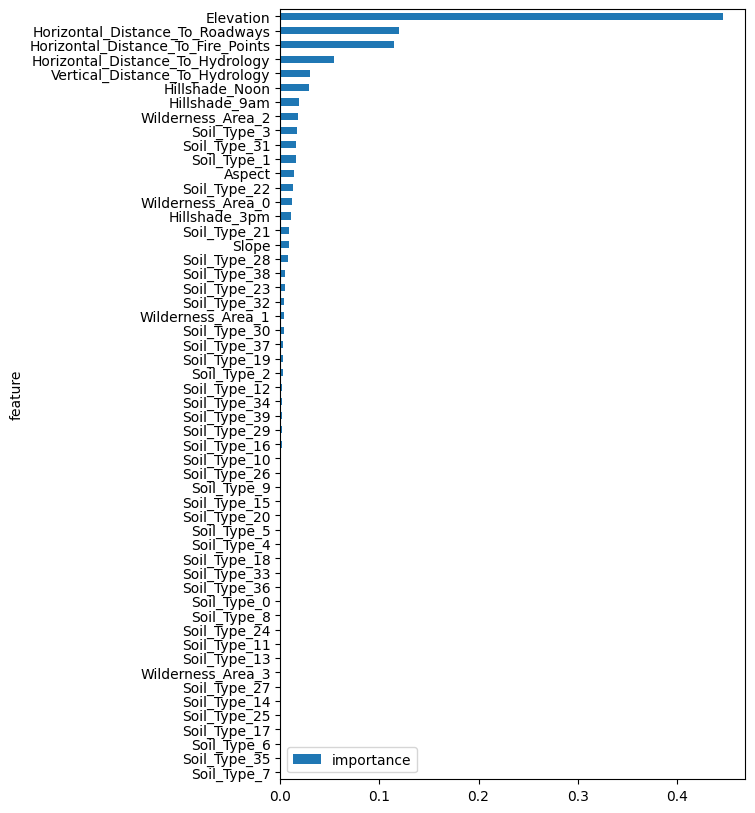

In [13]:
feature_df.plot.barh(x='feature', y='importance', figsize=(6, 10))

In [14]:
feature_df

,feature,importance
21,Soil_Type_7,0.000000
49,Soil_Type_35,0.000000
20,Soil_Type_6,0.000000
31,Soil_Type_17,0.000000
39,Soil_Type_25,0.000000
28,Soil_Type_14,0.000009
41,Soil_Type_27,0.000028
13,Wilderness_Area_3,0.000036
27,Soil_Type_13,0.000081
25,Soil_Type_11,0.000086


<Axes: ylabel='feature'>

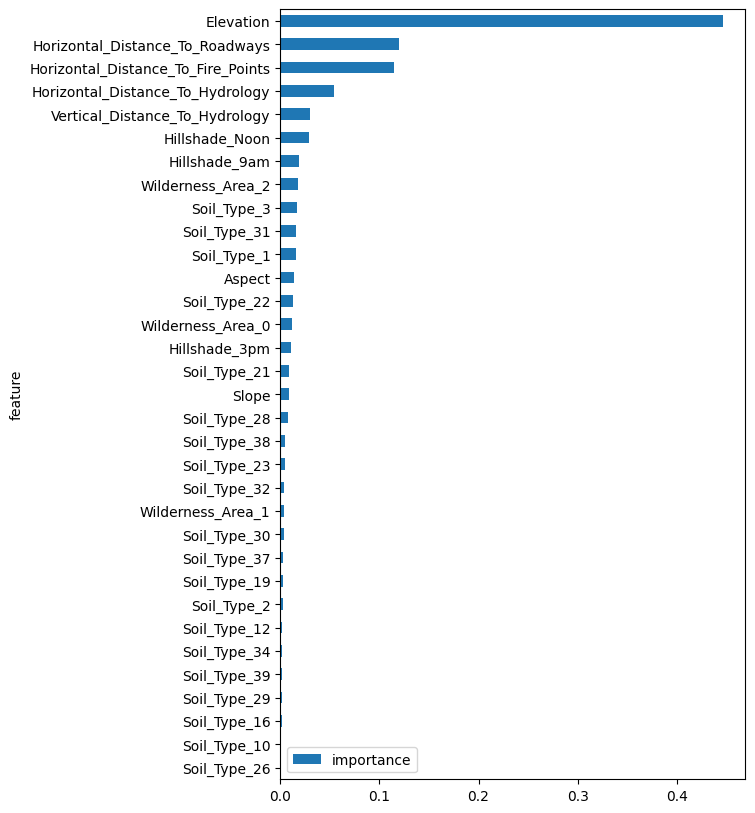

In [15]:
feature_df_2 = feature_df[feature_df['importance'] > 0.001]
feature_df_2.plot.barh(x='feature', y='importance', figsize=(6, 10))

訓練データ(X_train, y_train)に対して次元削減を行い、新たな訓練データ(X_train2, y_train2)を得る。

In [16]:
X_train_df = pd.DataFrame(X_train, columns=features)
X_train_df = X_train_df.drop(feature_df['feature'][feature_df['importance'] <= 0.001], axis=1)
X_train2 = X_train_df.to_numpy()

X_test_df = pd.DataFrame(X_test, columns=features)
X_test_df = X_test_df.drop(feature_df['feature'][feature_df['importance'] <= 0.001], axis=1)
X_test2 = X_test_df.to_numpy()

## 機械学習モデルの比較

### 決定木 (チューニング前)

次元削減の効果を見るため、新たな訓練データで決定木(チューニング前)を学習させ、問１の決定木(チューニング前)と比較する。

In [17]:
%%time
clf2_1_default = DecisionTreeClassifier(random_state=1).fit(X_train2, y_train)

CPU times: user 10.2 s, sys: 33 ms, total: 10.2 s
Wall time: 10.3 s


In [18]:
print('Train accuracy: ', clf2_1_default.score(X_train2, y_train))
print('Test accuracy: ', clf2_1_default.score(X_test2, y_test))

Train accuracy:  1.0
Test accuracy:  0.9384525356488215


### 決定木 (チューニング)

#### グリッドサーチ / 学習

訓練データは次元削減済みのものを用いる。

In [19]:
param_grid = {'max_depth': np.arange(6, 31, 3)}

In [20]:
%%time
clf2_1_cv = DecisionTreeClassifier(random_state=1)
clf2_1_cv = GridSearchCV(clf2_1_cv, param_grid, cv=5, return_train_score=True).fit(X_train2, y_train)

CPU times: user 4min 56s, sys: 2.88 s, total: 4min 59s
Wall time: 5min 9s


In [21]:
print('Best parameter (max_depth): ', clf2_1_cv.best_params_)
print('Best test accuracy: ', clf2_1_cv.best_score_)

Best parameter (max_depth):  {'max_depth': 30}
Best test accuracy:  0.9301175346781875


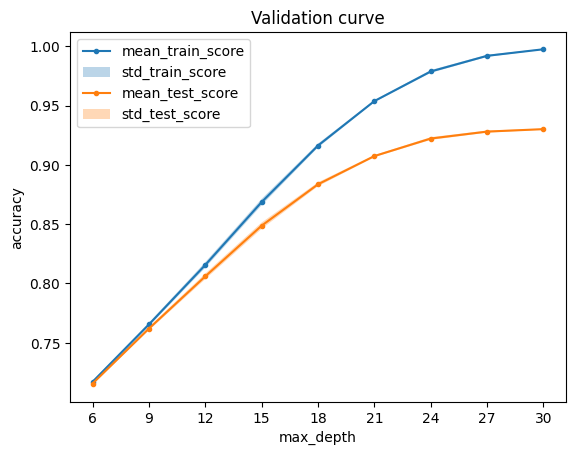

In [22]:
depths = param_grid['max_depth']
results = clf2_1_cv.cv_results_
mean_train_scores = results['mean_train_score']
std_train_scores = results['std_train_score']
mean_test_scores = results['mean_test_score']
std_test_scores = results['std_train_score']
alpha = 0.3

plt.plot(depths, mean_train_scores, marker='.')
plt.fill_between(depths, mean_train_scores + std_train_scores, mean_train_scores - std_train_scores, alpha=alpha)
plt.plot(depths, mean_test_scores, marker='.')
plt.fill_between(depths, mean_test_scores + std_test_scores, mean_test_scores - std_test_scores, alpha=alpha)
plt.title('Validation curve')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(depths)
plt.legend(['mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score'])

#### 最終モデル

In [23]:
%%time
clf2_1_final = DecisionTreeClassifier(max_depth=15, random_state=1).fit(X_train2, y_train)

CPU times: user 8.74 s, sys: 40.7 ms, total: 8.78 s
Wall time: 9.53 s


In [24]:
print(f'Train accuracy: {clf2_1_final.score(X_train2, y_train)}')
print(f'Test accuracy: {clf2_1_final.score(X_test2, y_test)}')

Train accuracy: 0.8670550699319506
Test accuracy: 0.8500555063122295


### ランダムフォレスト (チューニング前)


元の訓練データを用いた場合

In [38]:
%%time
clf2_2_default1 = RandomForestClassifier(random_state=1).fit(X_train, y_train)

CPU times: user 2min 55s, sys: 1.55 s, total: 2min 57s
Wall time: 3min 7s


In [39]:
print('Train accuracy: ', clf2_2_default1.score(X_train, y_train))
print('Test accuracy: ', clf2_2_default1.score(X_test, y_test))

Train accuracy:  1.0
Test accuracy:  0.9548720773129782


次元削減済みの訓練データを用いた場合

In [25]:
%%time
clf2_2_default = RandomForestClassifier(random_state=1).fit(X_train2, y_train)

CPU times: user 2min 29s, sys: 1.26 s, total: 2min 30s
Wall time: 2min 32s


In [26]:
print('Train accuracy: ', clf2_2_default.score(X_train2, y_train))
print('Test accuracy: ', clf2_2_default.score(X_test2, y_test))

Train accuracy:  1.0
Test accuracy:  0.956309217490082


### ランダムフォレスト (チューニング)

訓練データは次元削減済みのものを用いる。

In [27]:
param_grid = {
  'max_depth': np.arange(6, 31, 3),
  'n_estimators': np.arange(6, 31, 3)
}

In [28]:
%%time
clf2_2_cv = RandomForestClassifier(random_state=1)
clf2_2_cv = GridSearchCV(clf2_2_cv, param_grid, cv=5, return_train_score=True).fit(X_train2, y_train)

CPU times: user 1h 57min 26s, sys: 44.8 s, total: 1h 58min 11s
Wall time: 1h 59min 2s


In [40]:
print('Best Parameter (max_depth, n_estimators): ', clf2_2_cv.best_params_)
print('Best test accuracy: ', clf2_2_cv.best_score_)

Best Parameter (max_depth, n_estimators):  {'max_depth': 30, 'n_estimators': 30}
Best test accuracy:  0.9438780217003316


In [30]:
depths = param_grid['max_depth']
results = clf2_2_cv.cv_results_
mean_train_scores = results['mean_train_score']
mean_test_scores = results['mean_test_score']

param1_array = results['param_max_depth'].data.astype(np.float64)
param2_array = results['param_n_estimators'].data.astype(np.float64)

Text(0.5, 1.0, 'Train accuracy')

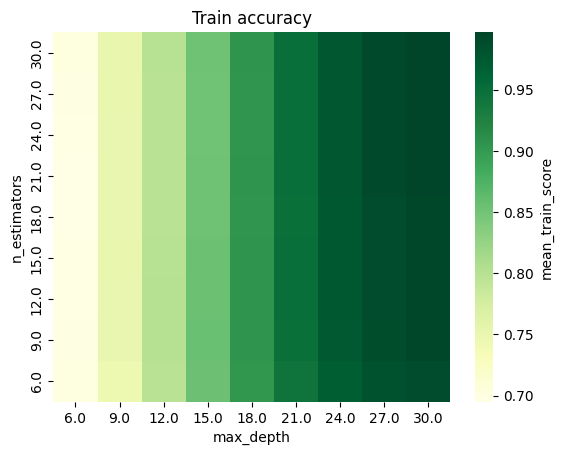

In [31]:
df_heat = pd.DataFrame(np.vstack([param1_array, param2_array, mean_train_scores]).T,
                       columns=['max_depth', 'n_estimators', 'mean_train_scores'])
df_pivot = pd.pivot_table(data=df_heat, values='mean_train_scores', 
                          columns='max_depth', index='n_estimators', aggfunc=np.mean)
df_pivot = df_pivot.iloc[::-1]

sns.heatmap(df_pivot, cmap='YlGn', cbar_kws={'label': 'mean_train_score'})
plt.title('Train accuracy')

Text(0.5, 1.0, 'Test accuracy')

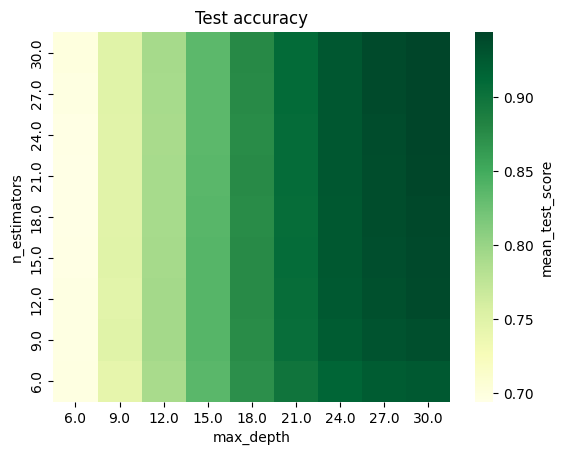

In [32]:
df_heat = pd.DataFrame(np.vstack([param1_array, param2_array, mean_test_scores]).T,
                       columns=['max_depth', 'n_estimators', 'mean_test_scores'])
df_pivot = pd.pivot_table(data=df_heat, values='mean_test_scores', 
                          columns='max_depth', index='n_estimators', aggfunc=np.mean)
df_pivot = df_pivot.iloc[::-1]

sns.heatmap(df_pivot, cmap='YlGn', cbar_kws={'label': 'mean_test_score'})
plt.title('Test accuracy')

Text(0.5, 1.0, 'Gap between train accuracy and test accuracy')

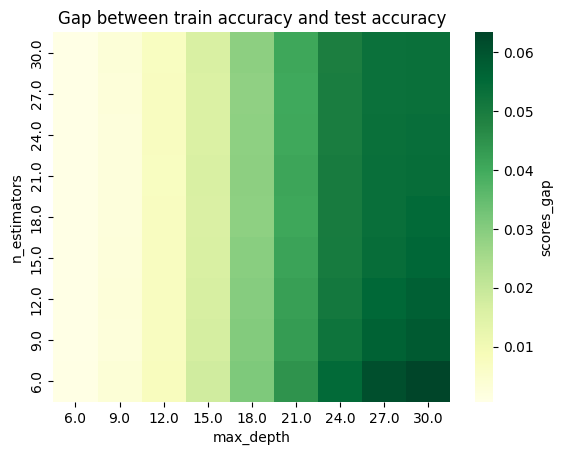

In [33]:
df_heat = pd.DataFrame(np.vstack([param1_array, param2_array, mean_train_scores - mean_test_scores]).T,
                       columns=['max_depth', 'n_estimators', 'scores_gap'])
df_pivot = pd.pivot_table(data=df_heat, values='scores_gap', 
                          columns='max_depth', index='n_estimators', aggfunc=np.mean)
df_pivot = df_pivot.iloc[::-1]

sns.heatmap(df_pivot, cmap='YlGn', cbar_kws={'label': 'scores_gap'})
plt.title('Gap between train accuracy and test accuracy')

#### 最終モデル

##### 次元削減済みのデータセットで学習 / 予測

In [34]:
%%time
clf2_2_final1 = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=1).fit(X_train2, y_train)

CPU times: user 1min 49s, sys: 160 ms, total: 1min 49s
Wall time: 1min 50s


In [35]:
print(f'Train accuracy: {clf2_2_final1.score(X_train2, y_train)}')
print(f'Test accuracy: {clf2_2_final1.score(X_test2, y_test)}')

Train accuracy: 0.8556417797417865
Test accuracy: 0.8409937781296524


##### 元のデータセットで学習 / 予測

In [36]:
%%time
clf2_2_final2 = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=1).fit(X_train, y_train)

CPU times: user 1min 48s, sys: 116 ms, total: 1min 48s
Wall time: 1min 49s


In [37]:
print(f'Train accuracy: {clf2_2_final2.score(X_train, y_train)}')
print(f'Test accuracy: {clf2_2_final2.score(X_test, y_test)}')

Train accuracy: 0.8423029674554494
Test accuracy: 0.8288340232179892
